In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from scipy.stats import shapiro, probplot
from sklearn.utils import resample
from scipy.stats import spearmanr
from matplotlib.colors import LinearSegmentedColormap

Load data

In [2]:
df = pd.read_csv("output.csv")

df['Call_Created_Time'] = pd.to_datetime(df['Call_Created_Time'])


In [3]:
# df['Hour'] = df['Call_Created_Time'].dt.hour
# df['Year'] = df['Call_Created_Time'].dt.year
# df['Month'] = df['Call_Created_Time'].dt.month

Plot by year for call start time & statistics

In [4]:
#df = df[~df['Year'].isin([2022, 2023])]

Minimum Calls in a Year: 16642
Maximum Calls in a Year: 23576
Mean Calls per Year: 21207.33
Standard Deviation Calls per Year: 2498.00


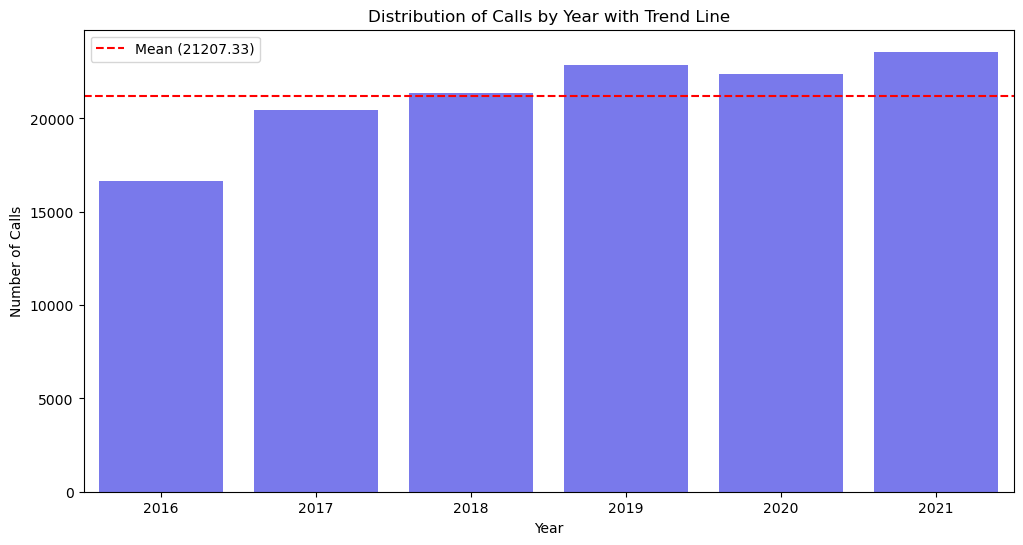

In [5]:

# Group by year and count the number of calls per year
calls_per_year = df.groupby('Year').size().reset_index(name='Call_Count')

# Sort the counts to find the second smallest
sorted_counts = calls_per_year['Call_Count'].sort_values()

# Calculate descriptive statistics for the count of calls
count_min = sorted_counts.iloc[0]
# second_count_min = sorted_counts.iloc[1]  #not necessary in analysis
count_max = sorted_counts.max()
count_mean = sorted_counts.mean()
count_std = sorted_counts.std()


print(f"Minimum Calls in a Year: {count_min}")
# print(f"Second Minimum Calls in a Year: {second_count_min}")
print(f"Maximum Calls in a Year: {count_max}")
print(f"Mean Calls per Year: {count_mean:.2f}")
print(f"Standard Deviation Calls per Year: {count_std:.2f}")

# Plot the distribution of calls per year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Call_Count', data=calls_per_year, color='blue', alpha=0.6)

# Add a horizontal line for the mean
plt.axhline(y=count_mean, color='red', linestyle='--', label=f'Mean ({count_mean:.2f})')

plt.title('Distribution of Calls by Year with Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

Plot by month for call start time & statistics

Minimum Calls in a Month: 10001
Maximum Calls in a Month: 11526
Mean Calls per Month: 10603.67
Standard Deviation Calls per Month: 417.07


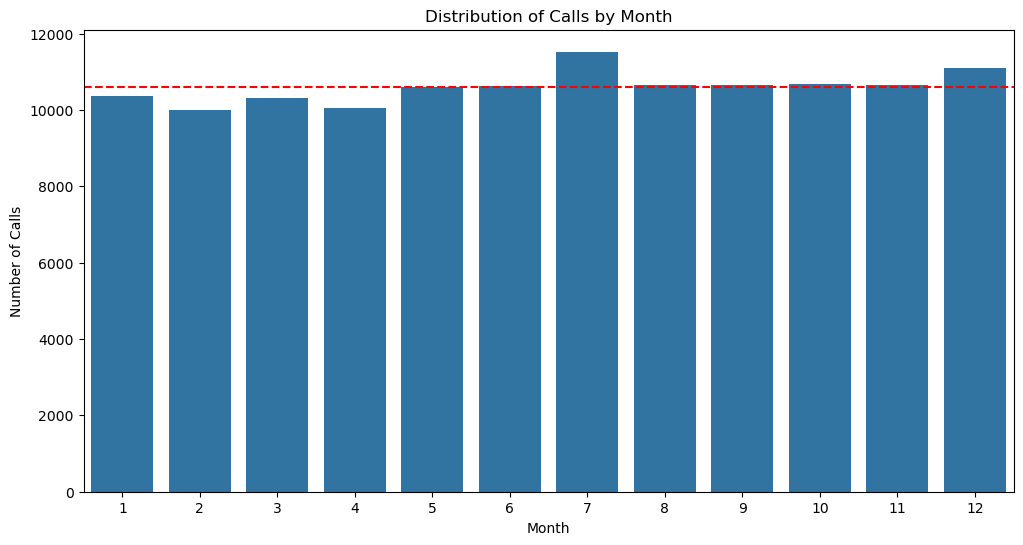

In [6]:

# Groups the data by month and counts the number of calls per month.
calls_per_month = df.groupby('Month').size().reset_index(name='Call_Count')

# Sort the counts for consistency
sorted_counts = calls_per_month['Call_Count'].sort_values()

# Calculate descriptive statistics for the count of calls
count_min = sorted_counts.iloc[0]
count_max = sorted_counts.max()
count_mean = sorted_counts.mean()
count_std = sorted_counts.std()

print(f"Minimum Calls in a Month: {count_min}")
print(f"Maximum Calls in a Month: {count_max}")
print(f"Mean Calls per Month: {count_mean:.2f}")
print(f"Standard Deviation Calls per Month: {count_std:.2f}")

# Plot the distribution of calls per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df)


# Add a horizontal line for the mean
plt.axhline(y=count_mean, color='red', linestyle='--', label=f'Mean ({count_mean:.2f})')
plt.title('Distribution of Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

Plot by hour for call start time & statistics

Minimum Calls in a Hour: 2100
Maximum Calls in a Hour: 7962
Mean Calls per Hour: 5301.83
Standard Deviation Calls per Hour: 1934.90


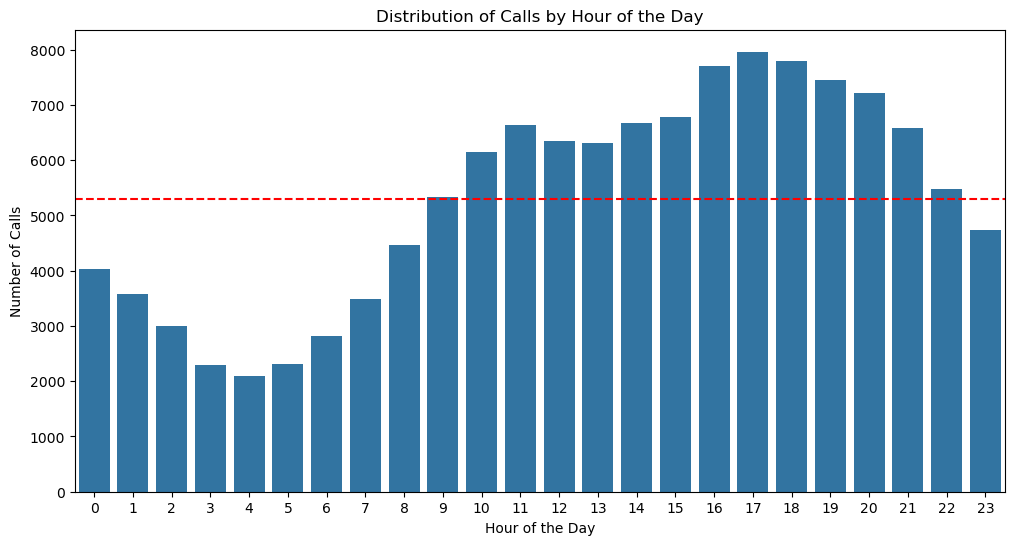

In [7]:

# Group by hour and count the number of calls per hour
calls_per_hour = df.groupby('Hour').size().reset_index(name='Call_Count')

# Sort the counts for consistency
sorted_counts = calls_per_hour['Call_Count'].sort_values()

# Calculate descriptive statistics for the count of calls
count_min = sorted_counts.iloc[0]
count_max = sorted_counts.max()
count_mean = sorted_counts.mean()
count_std = sorted_counts.std()

print(f"Minimum Calls in a Hour: {count_min}")
print(f"Maximum Calls in a Hour: {count_max}")
print(f"Mean Calls per Hour: {count_mean:.2f}")
print(f"Standard Deviation Calls per Hour: {count_std:.2f}")
# Plot the distribution of calls per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
# Add a horizontal line for the mean
plt.axhline(y=count_mean, color='red', linestyle='--', label=f'Mean ({count_mean:.2f})')
plt.title('Distribution of Calls by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

All together over hour by year

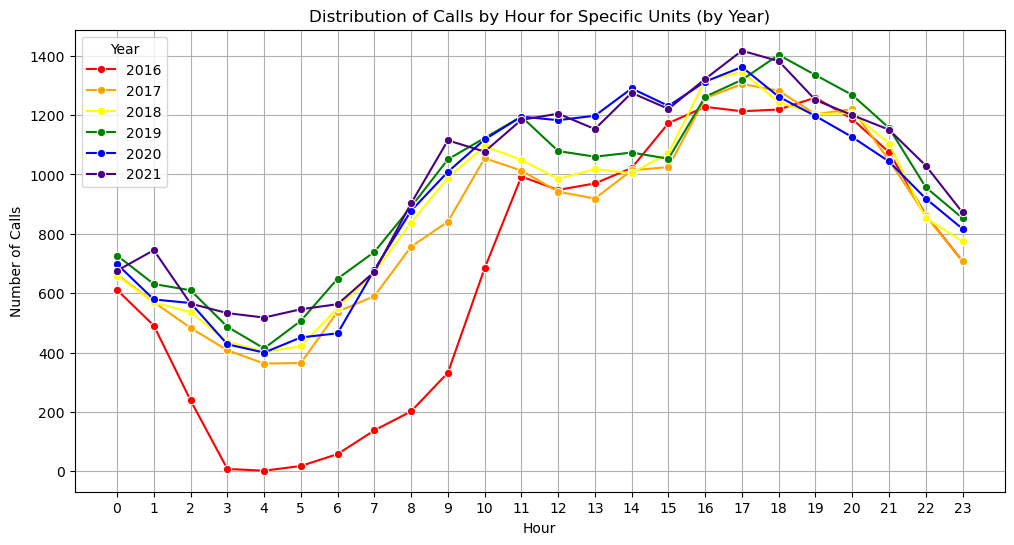

In [8]:
#Groups the data by hour and year, then plots the distribution of calls by hour for each year as a line plot. The years 2022 and 2023 are excluded.
calls_by_hour_year = df.groupby(['Hour', 'Year']).size().reset_index(name='Call_Count')

#Color coding rainbow for sequential analysis
colors = ["red", "orange", "yellow", "green", "blue", "indigo"]
rainbow_cmap = LinearSegmentedColormap.from_list("", colors)
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Call_Count',hue="Year",palette=rainbow_cmap, data=calls_by_hour_year, marker='o')
plt.xticks(range(0, 24))
plt.title('Distribution of Calls by Hour for Specific Units (by Year)')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [9]:
# Group the filtered data by year and month and count the number of calls
calls_by_year_hour_filtered = df[~df['Year'].isin([2022, 2023])].groupby(['Year', 'Hour']).size()

# Calculate the standard deviation of calls for each month across different years
std_calls_by_hour_year_filtered = calls_by_year_hour_filtered.groupby(level=[1]).std().fillna(0)

print("Standard Deviation of Calls by Hour and Year (Excluding 2022 and 2023):")
print(std_calls_by_hour_year_filtered)

Standard Deviation of Calls by Hour and Year (Excluding 2022 and 2023):
Hour
0      39.210543
1      85.007647
2     134.551106
3     189.475856
4     178.270581
5     190.549381
6     210.542791
7     222.305795
8     271.149713
9     287.844229
10    169.137419
11     96.524436
12    117.093125
13    106.905566
14    133.459232
15     90.034808
16     39.120327
17     68.161573
18     76.023023
19     53.072278
20     46.275984
21     49.512625
22     69.799713
23     71.062414
dtype: float64


The most variable hours are 2PM, 12PM, 1PM, and 9AM. The most consistent hours are 12AM, 10AM,4PM, and 5PM. In order.



All together over month by year

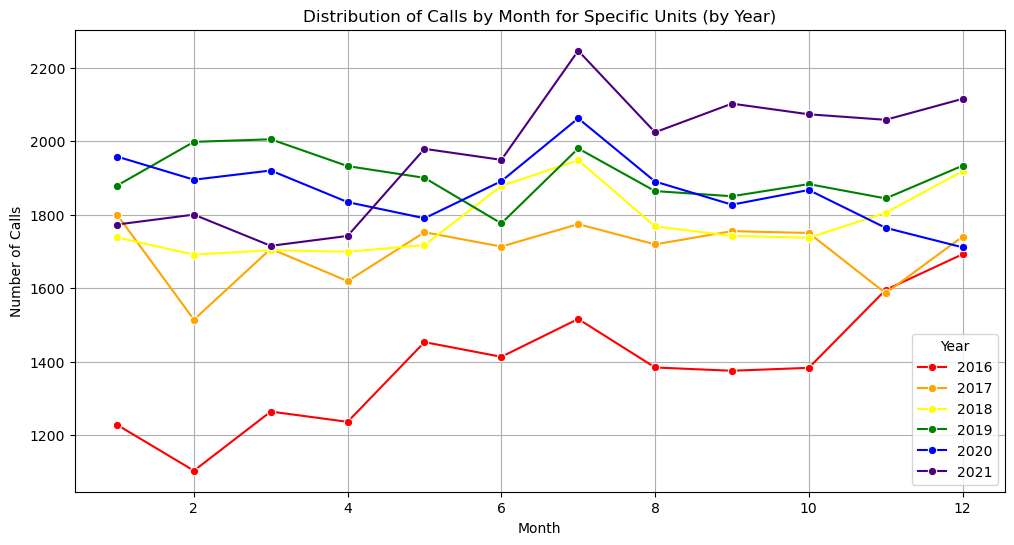

In [10]:
#Groups the data by hour and year, then plots the distribution of calls by hour for each year as a line plot. The years 2022 and 2023 are excluded.
calls_by_month_year = df.groupby(['Month', 'Year']).size().reset_index(name='Call_Count')

#Same color mapping as above
colors = ["red", "orange", "yellow", "green", "blue", "indigo"]
rainbow_cmap = LinearSegmentedColormap.from_list("", colors)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Call_Count',hue="Year",palette=rainbow_cmap, data=calls_by_month_year, marker='o')
plt.title('Distribution of Calls by Month for Specific Units (by Year)')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [11]:
# Group the filtered data by year and month and count the number of calls
calls_by_year_month_filtered = df.groupby(['Year', 'Month']).size()

# Calculate the standard deviation of calls for each month across different years
std_calls_by_month_year_filtered = calls_by_year_month_filtered.groupby(level=[1]).std().fillna(0)

print("Standard Deviation of Calls by Month and Year (Excluding 2022 and 2023):")
print(std_calls_by_month_year_filtered)

Standard Deviation of Calls by Month and Year (Excluding 2022 and 2023):
Month
1     258.069500
2     322.897765
3     256.763705
4     241.755248
5     181.363080
6     194.463364
7     251.137413
8     218.729437
9     235.264461
10    229.937745
11    175.494349
12    166.198375
dtype: float64


The most variable months are Feb, Jul, Nov, and December. The most consistent months are Jan,Jun,May, and August. In order.

July and late afternoon are times of interest, looking at them further:

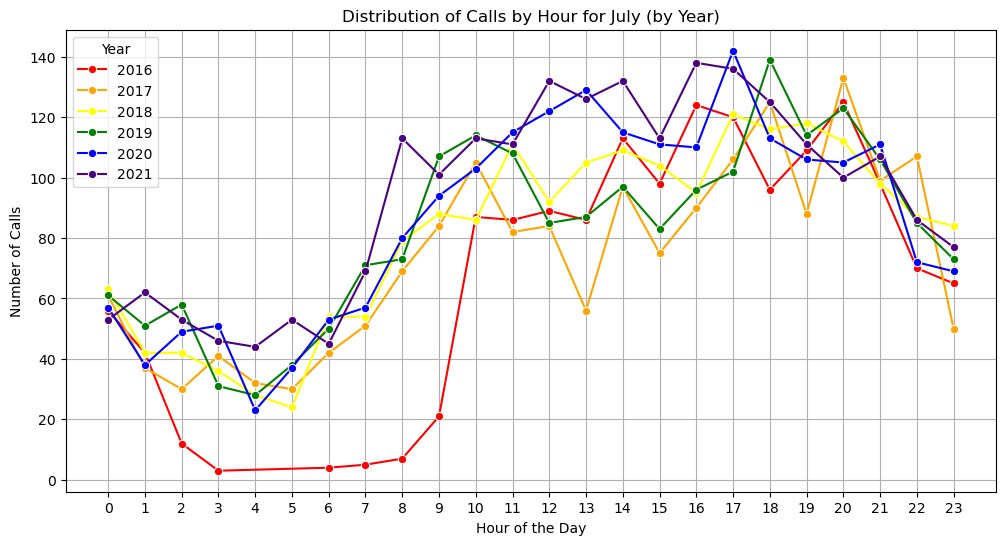

In [12]:
# Filter the data for the month of July
july_data = df[df['Month'] == 7]

# Group by hour and year, and count the number of calls
calls_by_hour_year_2 = july_data.groupby(['Hour', 'Year']).size().reset_index(name='Call_Count')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Call_Count', hue='Year',palette=rainbow_cmap, data=calls_by_hour_year_2[~calls_by_hour_year_2['Year'].isin([2022, 2023])], marker='o')
plt.xticks(range(0, 24))
plt.title('Distribution of Calls by Hour for July (by Year)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.legend(title='Year')
plt.grid(True)
plt.show()

Correlation analysis

Initial check for outliers and patterns in the data for percent change

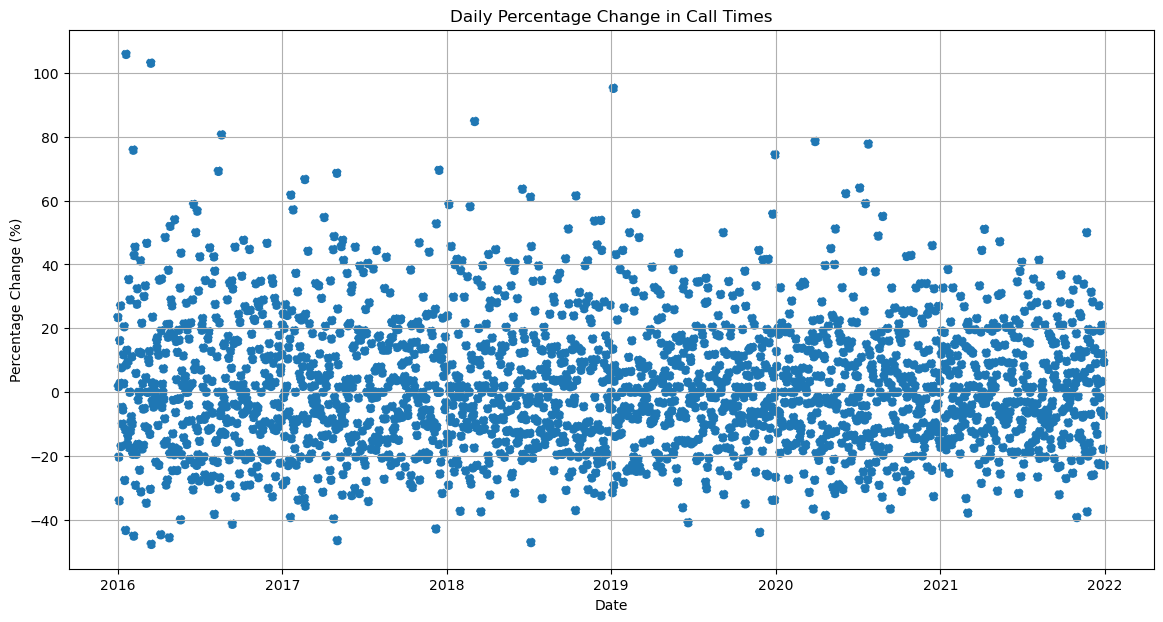

In [13]:

# Count number of calls per day
calls_per_day = df.groupby('Date').size()

# Calculate percentage change day over day
calls_pct_change = calls_per_day.pct_change() * 100

#Add percent change to the original dataframe
df['calls_pct_change'] = calls_pct_change

# Reset index for plotting
calls_pct_change_df = calls_pct_change.reset_index()

# Convert 'Date' column to datetime format
calls_pct_change_df['Date'] = pd.to_datetime(calls_pct_change_df['Date'])

# Plot the percentage change
plt.figure(figsize=(14, 7))
plt.scatter(calls_pct_change_df['Date'], calls_pct_change_df[0],marker='o', linestyle='--')
plt.title('Daily Percentage Change in Call Times')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

Check for normal distribution

In [14]:
#calls_pct_change_df

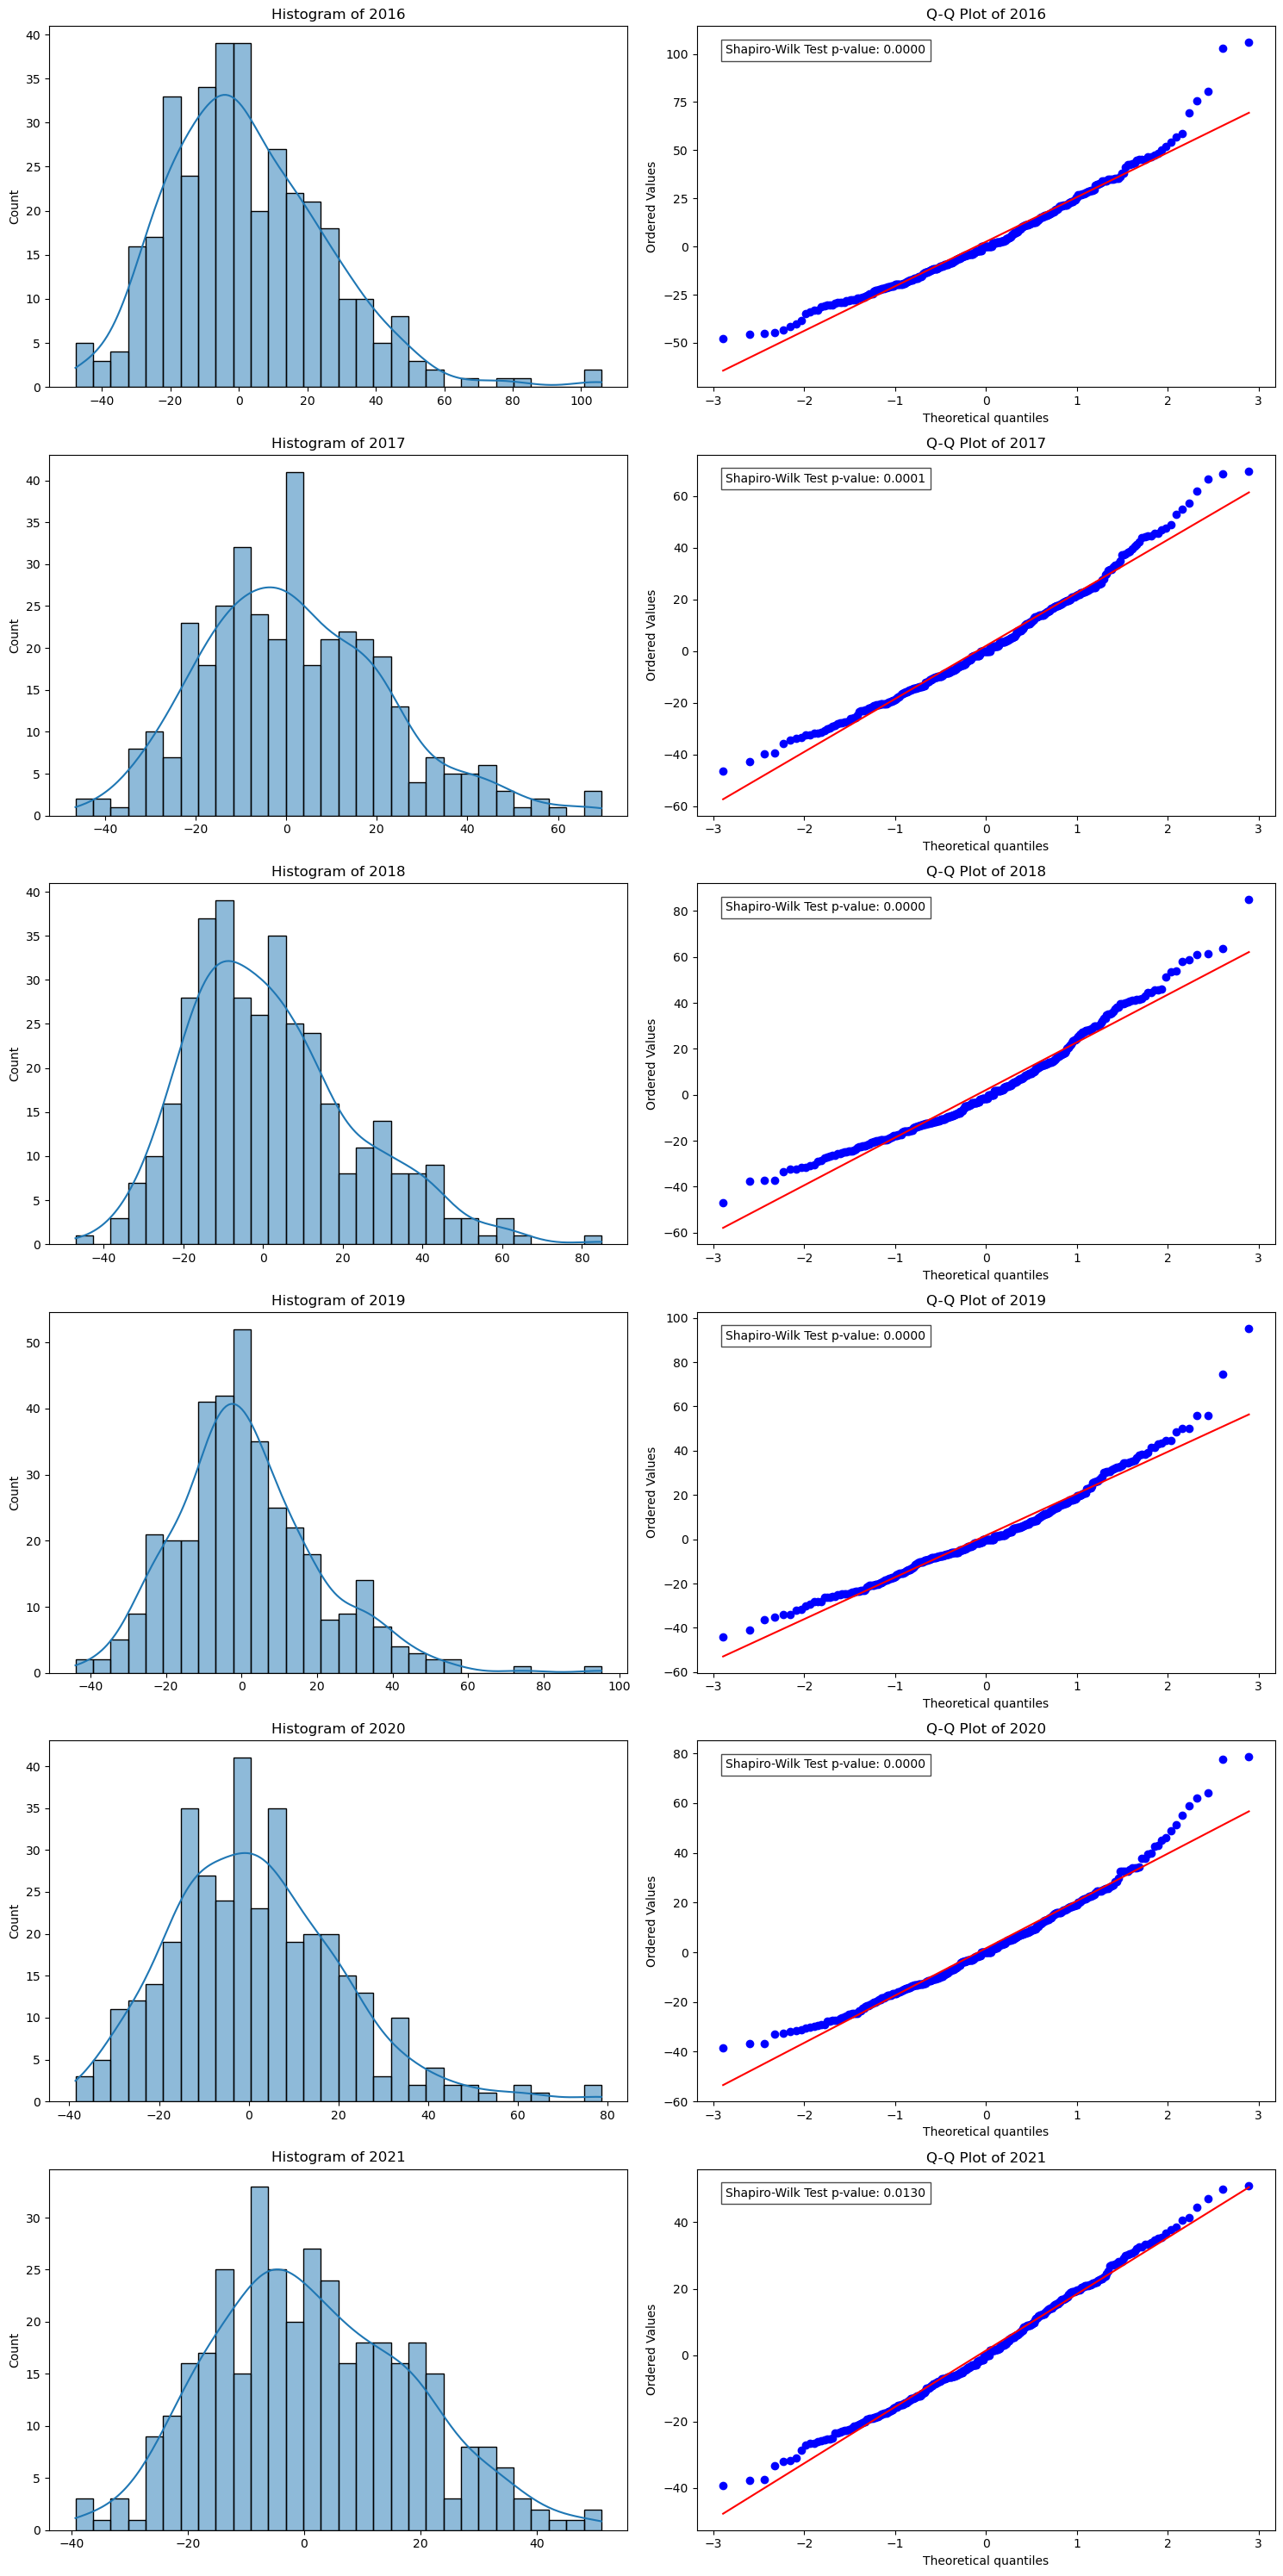

In [15]:
# Rename the columns
calls_pct_change_df.columns = ['Date', 'calls_pct_change']
calls_pct_change_df['Year'] = pd.to_datetime(calls_pct_change_df['Date']).dt.year

# Filter out February 29th records (Leap Year)
calls_pct_change_df_2 = calls_pct_change_df[~((calls_pct_change_df['Date'].dt.month == 2) & (calls_pct_change_df['Date'].dt.day == 29))]

years = calls_pct_change_df['Year'].unique()
years = [year for year in years if year not in [2023, 2022]]


# Create subplots for histogram and Q-Q plot
fig, axes = plt.subplots(len(years), 2, figsize=(15, len(years)*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot histogram and Q-Q plot for each year
for i, year in enumerate(years):
    data = calls_pct_change_df_2[calls_pct_change_df_2['Year'] == year]['calls_pct_change'].fillna(0).values
    
    # Histogram
    sns.histplot(data, bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {year}')
    #axes[i, 0].set_xlabel("Percent Change by Day")
    
    
    # Q-Q plot
    probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {year}')
    
    # Shapiro-Wilk test
    stat, p = shapiro(data)
    axes[i, 1].text(0.05, 0.95, f'Shapiro-Wilk Test p-value: {p:.4f}', transform=axes[i, 1].transAxes, 
                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

Subplots, correlation, and bootstraping with CI

0.8586578331476458
0.1276300364119298
0.16816401424041522
0.060257057001252966
0.10730179234381824
0.8586578331476458
0.714966189349932
0.7594217446831126
0.9166564553009896
0.7809589082125481
0.1276300364119298
0.714966189349932
0.796188119843136
0.9484552778247886
0.2181292265863446
0.16816401424041522
0.7594217446831126
0.796188119843136
0.031160895364943337
0.3106457569731107
0.060257057001252966
0.9166564553009896
0.9484552778247886
0.031160895364943337
0.43365712627223707
0.10730179234381824
0.7809589082125481
0.21812922658634473
0.3106457569731107
0.43365712627223707


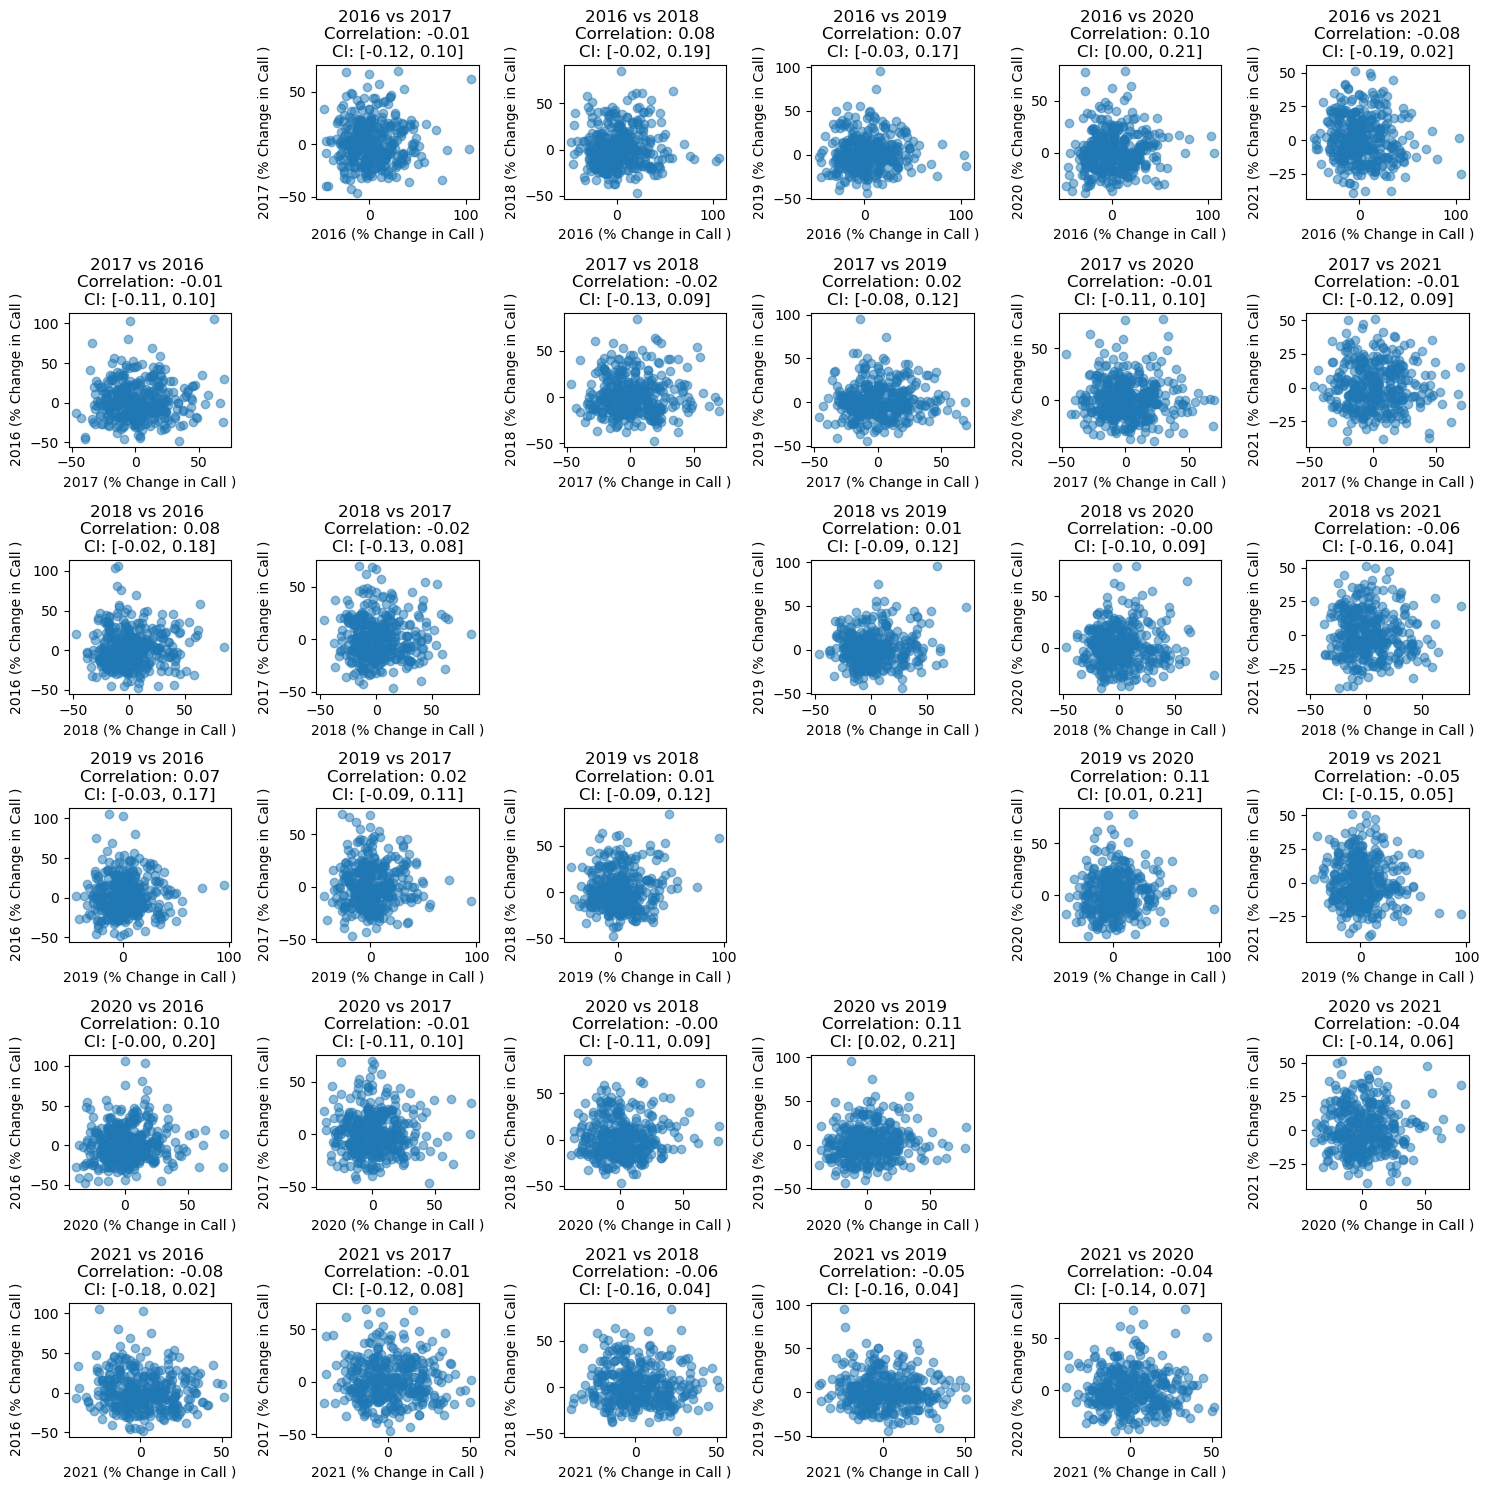

Correlation Matrix:
          2016      2017      2018      2019      2020      2021
2016       NaN -0.009353  0.079891  0.072288  0.098445 -0.084433
2017 -0.009353       NaN -0.019179  0.016083 -0.005496 -0.014604
2018  0.079891 -0.019179       NaN  0.013565 -0.003395 -0.064615
2019  0.072288  0.016083  0.013565       NaN  0.112825 -0.053213
2020  0.098445 -0.005496 -0.003395  0.112825       NaN -0.041105
2021 -0.084433 -0.014604 -0.064615 -0.053213 -0.041105       NaN

Confidence Intervals Matrix:
               2016           2017           2018           2019  \
2016            NaN  [-0.12, 0.10]  [-0.02, 0.19]  [-0.03, 0.17]   
2017  [-0.11, 0.10]            NaN  [-0.13, 0.09]  [-0.08, 0.12]   
2018  [-0.02, 0.18]  [-0.13, 0.08]            NaN  [-0.09, 0.12]   
2019  [-0.03, 0.17]  [-0.09, 0.11]  [-0.09, 0.12]            NaN   
2020  [-0.00, 0.20]  [-0.11, 0.10]  [-0.11, 0.09]   [0.02, 0.21]   
2021  [-0.18, 0.02]  [-0.12, 0.08]  [-0.16, 0.04]  [-0.16, 0.04]   

               202

In [16]:
# Function to calculate bootstrap confidence interval for Spearman correlation
def bootstrap_confidence_interval(data1, data2, n_bootstraps=1000, alpha=0.05):
    bootstrapped_corrs = []
    n = len(data1)
    for _ in range(n_bootstraps):
        sample1, sample2 = resample(data1, data2)
        corr, _ = spearmanr(sample1, sample2)
        bootstrapped_corrs.append(corr)
    sorted_corrs = np.sort(bootstrapped_corrs)
    ci_lower = sorted_corrs[int((alpha/2) * n_bootstraps)]
    ci_upper = sorted_corrs[int((1 - alpha/2) * n_bootstraps)]
    return ci_lower, ci_upper


# Plot scatterplots for each pair of years and calculate correlation
correlations = pd.DataFrame(index=years, columns=years)
confidence_intervals = pd.DataFrame(index=years, columns=years)  # To store the confidence intervals

# Number of years
num_years = len(years)


# Create subplots
fig, axes = plt.subplots(num_years, num_years, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot scatterplots for each pair of years
for i, year_i in enumerate(years):
    for j, year_j in enumerate(years):
        if i != j:  # No need to plot a year against itself
            x_data = calls_pct_change_df_2[calls_pct_change_df_2['Year'] == year_i]['calls_pct_change'].fillna(0).values #Starting dates have no percent change
            y_data = calls_pct_change_df_2[calls_pct_change_df_2['Year'] == year_j]['calls_pct_change'].fillna(0).values
            
            # Calculate correlation coefficient
            correlation, _ = spearmanr(x_data, y_data)
            print(_)
            ci_lower, ci_upper = bootstrap_confidence_interval(x_data, y_data)
            correlations.at[year_i, year_j] = correlation
            confidence_intervals.at[year_i, year_j] = f'[{ci_lower:.2f}, {ci_upper:.2f}]'
            # Access the color based on the year index (i or j)
            color_index = i % len(colors)  # Wrap around if more years than colors

            axes[i, j].scatter(x_data, y_data, alpha=0.5)
            axes[i, j].set_xlabel(f'{year_i} (% Change in Call )')
            axes[i, j].set_ylabel(f'{year_j} (% Change in Call )')
            axes[i, j].set_title(f'{year_i} vs {year_j} \nCorrelation: {correlation:.2f}\nCI: [{ci_lower:.2f}, {ci_upper:.2f}]')

# Remove diagonal subplots
for i in range(num_years):
    for j in range(num_years):
        if i == j:
            fig.delaxes(axes[i, j])
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlations)

# Display the confidence intervals matrix
print("\nConfidence Intervals Matrix:")
print(confidence_intervals)

Zip Code Analysis

In [17]:
# unique_zipcodes = df['Call_Zipcode'].unique()
# num_zipcodes = len(unique_zipcodes)

In [18]:
# fig, axes = plt.subplots(nrows=num_zipcodes, ncols=1, figsize=(12, num_zipcodes * 4), sharex=True)

# # Iterate through each zip code and plot the count of calls by year
# for i, zipcode in enumerate(unique_zipcodes):
#     ax = axes[i]
#     zip_df = df[df['Call_Zipcode'] == zipcode]
#     sns.countplot(data=zip_df, x='Year', ax=ax)
#     ax.set_title(f'Distribution of Calls by Year in Zip Code {zipcode}')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Number of Calls')

# plt.tight_layout()
# plt.show()

In [19]:
# excluded_zipcodes = ['97478', '97419', '97437', '97448', '97424', 'nan']
# df = df[~df['Call_Zipcode'].isin(excluded_zipcodes) & df['Call_Zipcode'].notna()]

Insufficient data in 97478,97419,97437,97448,97424,nan, exclude these.

In [20]:
# # Create a DataFrame to hold the count of calls by hour for each zip code
# hourly_counts = df.groupby(['Call_Zipcode', 'Hour']).size().reset_index(name='Counts')

# # Plot line plots
# plt.figure(figsize=(14, 8))
# for zipcode in unique_zipcodes:
#     zip_df = hourly_counts[hourly_counts['Call_Zipcode'] == zipcode]
#     sns.lineplot(data=zip_df, x='Hour', y='Counts', label=zipcode)
#     desc_stats = zip_df['Counts'].describe()[['min', 'max', 'mean','std']]
#     print(f"Zip Code: {zipcode}")
#     print(desc_stats.to_string())

# plt.title('Distribution of Call Times by Hour Across Zip Codes')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Number of Calls')
# plt.legend(title='Zip Code')
# plt.xticks(range(0, 24))
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [21]:
# # Create a DataFrame to hold the count of calls by month for each zip code
# monthly_counts = df.groupby(['Call_Zipcode', 'Month']).size().reset_index(name='Counts')

# # Normalize the counts to proportions for each zip code
# monthly_counts['Proportion'] = monthly_counts.groupby('Call_Zipcode')['Counts'].transform(lambda x: x / x.sum())

# # Perform KS test for each pair of zip codes
# unique_zipcodes = monthly_counts['Call_Zipcode'].unique()
# # Plot line plots
# plt.figure(figsize=(14, 8))
# for zipcode in unique_zipcodes:
#     zip_df = monthly_counts[monthly_counts['Call_Zipcode'] == zipcode]
#     sns.lineplot(data=zip_df, x='Month', y='Counts', label=zipcode)
#     desc_stats = zip_df['Counts'].describe()[['min', 'max', 'mean','std']]
#     print(f"Zip Code: {zipcode}")
#     print(desc_stats.to_string())


# plt.title('Distribution of Call Times by Month Across Zip Codes')
# plt.xlabel('Month of the Year (all years 2016-2021)')
# plt.ylabel('Number of Calls')
# plt.legend(title='Zip Code')
# #plt.xticks(range(0, 12))
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Correlation analysis

In [22]:
# #EACH YEAR BY THE FIRST ZIP CODE


# # Count number of calls per day per zip code
# calls_per_day_zip = df.groupby(['Date', 'Call_Zipcode']).size().unstack(fill_value=0)

# # Calculate percentage change day over day for each zip code
# calls_pct_change_zip = calls_per_day_zip.pct_change() * 100

# # Reset the index to get a DataFrame
# calls_pct_change_zip_df = calls_pct_change_zip.reset_index().melt(id_vars='Date', var_name='ZipCode', value_name='calls_pct_change')

# # # Drop NaN values resulting from the percentage change calculation
# # calls_pct_change_df = calls_pct_change_df.dropna()

# # Extract year from the 'Date' column
# calls_pct_change_zip_df['Year'] = pd.to_datetime(calls_pct_change_zip_df['Date']).dt.year

# # Filter out February 29th records
# calls_pct_change_zip_df = calls_pct_change_zip_df[~((pd.to_datetime(calls_pct_change_zip_df['Date']).dt.month == 2) & (pd.to_datetime(calls_pct_change_zip_df['Date']).dt.day == 29))]
# # Function to calculate bootstrap confidence interval for Spearman correlation
# def bootstrap_confidence_interval(data1, data2, n_bootstraps=1000, alpha=0.05):
#     bootstrapped_corrs = []
#     for _ in range(n_bootstraps):
#         sample1, sample2 = resample(data1, data2)
#         corr, _ = spearmanr(sample1, sample2)
#         bootstrapped_corrs.append(corr)
#     sorted_corrs = np.sort(bootstrapped_corrs)
#     ci_lower = sorted_corrs[int((alpha/2) * n_bootstraps)]
#     ci_upper = sorted_corrs[int((1 - alpha/2) * n_bootstraps)]
#     return ci_lower, ci_upper

# years = calls_pct_change_zip_df['Year'].unique()
# years = [year for year in years if year not in [2023, 2022]]

# # Group the data by zip code
# grouped = calls_pct_change_zip_df.groupby('ZipCode')

# # Create multi-index DataFrames to store correlations and confidence intervals
# correlations = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=years)
# confidence_intervals = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=years)

# # Create subplots
# fig, axes = plt.subplots(len(years), len(years), figsize=(15, 15))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

# # Plot scatterplots and calculate correlations and confidence intervals for each zip code
# for zipcode, group in grouped:
#     for i, year_i in enumerate(years):
#         for j, year_j in enumerate(years):
#             if i != j:  # No need to plot a year against itself
#                 x_data = group[group['Year'] == year_i]['calls_pct_change'].fillna(0).values
#                 y_data = group[group['Year'] == year_j]['calls_pct_change'].fillna(0).values
                
#                 # Calculate correlation coefficient
#                 if len(x_data) > 0 and len(y_data) > 0:  # Ensure there is data to correlate
#                     correlation, _ = spearmanr(x_data, y_data)
#                     ci_lower, ci_upper = bootstrap_confidence_interval(x_data, y_data)
#                     correlations.at[(zipcode, year_i), year_j] = correlation
#                     confidence_intervals.at[(zipcode, year_i), year_j] = f'[{ci_lower:.2f}, {ci_upper:.2f}]'
                    
#                     if zipcode == list(grouped.groups.keys())[0]:  # Only plot for the first zip code
#                         axes[i, j].scatter(x_data, y_data, alpha=0.5)
#                         axes[i, j].set_xlabel(f'{year_i} (%)')
#                         axes[i, j].set_ylabel(f'{year_j} (%)')
#                         axes[i, j].set_title(f'{year_i} vs {year_j}\nCorrelation: {correlation:.2f}\nCI: [{ci_lower:.2f}, {ci_upper:.2f}]')

# # Remove diagonal subplots
# for i in range(len(years)):
#     for j in range(len(years)):
#         if i == j:
#             fig.delaxes(axes[i, j])
# plt.tight_layout()
# plt.show()

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlations)

# # Display the confidence intervals matrix
# print("\nConfidence Intervals Matrix:")
# print(confidence_intervals)



In [23]:
# # Function to calculate bootstrap confidence interval for Spearman correlation
# def bootstrap_confidence_interval(data1, data2, n_bootstraps=1000, alpha=0.05):
#     bootstrapped_corrs = []
#     for _ in range(n_bootstraps):
#         sample1, sample2 = resample(data1, data2)
#         corr, _ = spearmanr(sample1, sample2)
#         bootstrapped_corrs.append(corr)
#     sorted_corrs = np.sort(bootstrapped_corrs)
#     ci_lower = sorted_corrs[int((alpha/2) * n_bootstraps)]
#     ci_upper = sorted_corrs[int((1 - alpha/2) * n_bootstraps)]
#     return ci_lower, ci_upper

# years = calls_pct_change_zip_df['Year'].unique()
# years = [year for year in years if year not in [2023, 2022]]

# # Group the data by zip code
# grouped = calls_pct_change_zip_df.groupby('ZipCode')

# # Create multi-index DataFrames to store correlations and confidence intervals
# correlations = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=grouped.groups.keys())
# confidence_intervals = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=grouped.groups.keys())

# # Create subplots
# fig, axes = plt.subplots(len(grouped.groups.keys()), len(grouped.groups.keys()), figsize=(15, 15))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

# # Plot scatterplots and calculate correlations and confidence intervals for each zip code
# for i, (zipcode_i, group_i) in enumerate(grouped):
#     for j, (zipcode_j, group_j) in enumerate(grouped):
#         if i != j:  # No need to plot a zip code against itself
#             x_data = group_i['calls_pct_change'].fillna(0).values
#             y_data = group_j['calls_pct_change'].fillna(0).values
            
#             # Calculate correlation coefficient
#             if len(x_data) > 0 and len(y_data) > 0:  # Ensure there is data to correlate
#                 correlation, _ = spearmanr(x_data, y_data)
#                 ci_lower, ci_upper = bootstrap_confidence_interval(x_data, y_data)
#                 correlations.at[(zipcode_i, 'all_years'), zipcode_j] = correlation
#                 confidence_intervals.at[(zipcode_i, 'all_years'), zipcode_j] = f'[{ci_lower:.2f}, {ci_upper:.2f}]'
                
#                 axes[i, j].scatter(x_data, y_data, alpha=0.5)
#                 axes[i, j].set_xlabel(f'{zipcode_i} (%)')
#                 axes[i, j].set_ylabel(f'{zipcode_j} (%)')
#                 axes[i, j].set_title(f'{zipcode_i} vs {zipcode_j}\nCorrelation: {correlation:.2f}\nCI: [{ci_lower:.2f}, {ci_upper:.2f}]')

# # Remove diagonal subplots
# for i in range(len(grouped.groups.keys())):
#     for j in range(len(grouped.groups.keys())):
#         if i == j:
#             fig.delaxes(axes[i, j])
# plt.tight_layout()
# plt.show()

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlations)

# # Display the confidence intervals matrix
# print("\nConfidence Intervals Matrix:")
# print(confidence_intervals)